# Нелинейные модели для регрессии

## kNN (k ближайших соседей)

In [1]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [28]:
filename = 'git/data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)

In [29]:
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]

In [30]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = KNeighborsRegressor()

# отрицательное среднее среднеквадратичной ошибки
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print(results.mean())

-38.852320266666666


## Деревья классификации и регрессии (Decision Tree Regression)

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = DecisionTreeRegressor() 

scoring = 'neg_mean_squared_error' # критерий качества
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-19.97124705882353


ошибка меньше, следовательно, результат лучше

## Support Vector Machines (ядерный метод опорных векторов)

In [7]:
from sklearn.svm import SVR

In [8]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = SVR(gamma='auto')

scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-83.73272794073159


# Выбор лучшей модели классификации

In [9]:
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB # наивный байесовский классификатор
from sklearn.svm import SVC

In [31]:
filename = 'git/data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

In [32]:
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [12]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [13]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

In [14]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.770865 (0.050905)
LDA: 0.766969 (0.047966)
KNN: 0.710988 (0.050792)
CART: 0.681152 (0.055630)
NB: 0.759142 (0.038960)
SVM: 0.760458 (0.034712)


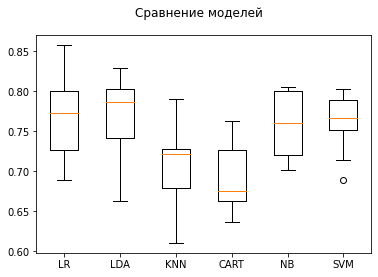

In [17]:
# построим ящик с усами
fig = pyplot.figure()
fig.suptitle('Сравнение моделей') # название
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

чем выше точность, тем лучше => лучшие модели LR и LDA (оранжевая полосна высокая)

# Создание программного конвейера (pipeline)

предотвращение утечки данные, стандартизация будет проводиться в каждой части в крос-валидации

### предварительная обрабботка (стандартизация) и моделирование

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [16]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))

In [17]:
model = Pipeline(estimators)

In [18]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7669685577580315


### отбор признаков + моделирование

In [19]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [20]:
features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

In [21]:
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression(solver='liblinear')))
model = Pipeline(estimators)

In [22]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7696001367054


результат ухудшился при n_components=3 и улучшился при n_components=2

# Поиск лучшей модели для регрессии

<p>Рассмотрим следующие модели оценки:</p>

- knn
- Decision Tree
- ядерный метод опорных векторов
- линейная регрессия
- Ridge
- Lasso
- Elastic Net

In [80]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [81]:
filename = 'git/data/housing.csv'
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names) 
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [82]:
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]

In [86]:
regression = []
regression.append(('kNN', KNeighborsRegressor()))
regression.append(('DTree', DecisionTreeRegressor()))
regression.append(('SVR', SVR(gamma='auto')))
regression.append(('Лин рег', LinearRegression()))
regression.append(('Ridge', Ridge()))
regression.append(('Lasso', Lasso()))
regression.append(('Elastic Net', ElasticNet()))

In [87]:
results = []
names = []
scoring = 'neg_mean_squared_error'

In [88]:
for name, model in regression:
    kFold = KFold(n_splits = 10, random_state = 7, shuffle = True)
    cv_results = cross_val_score(model, X, y, cv = kFold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

kNN: -38.852320 (14.660693)
DTree: -23.891670 (10.312435)
SVR: -83.732728 (26.794888)
Лин рег: -23.746502 (11.143430)
Ridge: -23.889890 (11.407334)
Lasso: -28.745890 (12.001845)
Elastic Net: -27.908420 (11.484450)


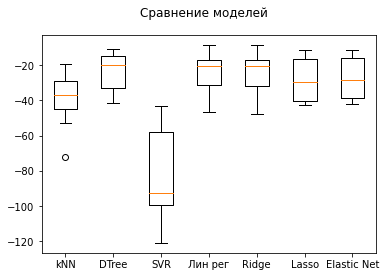

In [89]:
# построим ящик с усами
fig = pyplot.figure()
fig.suptitle('Сравнение моделей') # название
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()